###**Import Libraries**

In [47]:
import pandas as pd
import numpy as np
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

###**Load Data**

In [3]:
data = pd.read_csv("/content/emotions-dataset-for-nlp/train.txt", sep = ';')

In [4]:
data.columns = ['Text', 'Emotions']

In [5]:
data.head()

,Text,Emotions
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [9]:
#Converting data into list
texts = data['Text'].tolist()
labels = data['Emotions'].tolist()

In [7]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [8]:
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [10]:
# Encode the string labels to integers
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(labels)

In [12]:
# One-Hot encode label
one_hot_labels = keras.utils.to_categorical(label)

In [13]:
# Split the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences,
                                                    one_hot_labels,
                                                    test_size = 0.2)

###**Model Building and Training**

In [16]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim = len(tokenizer.word_index) + 1,
                    output_dim = 128, input_length = max_length))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = len(one_hot_labels[0]), activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/10
400/400 [==============================] - 27s 62ms/step - loss: 1.3661 - accuracy: 0.4724 - val_loss: 0.9127 - val_accuracy: 0.6828
Epoch 2/10
400/400 [==============================] - 27s 68ms/step - loss: 0.3872 - accuracy: 0.8770 - val_loss: 0.5116 - val_accuracy: 0.8303
Epoch 3/10
400/400 [==============================] - 21s 52ms/step - loss: 0.0662 - accuracy: 0.9830 - val_loss: 0.5288 - val_accuracy: 0.8384
Epoch 4/10
400/400 [==============================] - 25s 62ms/step - loss: 0.0259 - accuracy: 0.9946 - val_loss: 0.5822 - val_accuracy: 0.8325
Epoch 5/10
400/400 [==============================] - 27s 67ms/step - loss: 0.0188 - accuracy: 0.9963 - val_loss: 0.6595 - val_accuracy: 0.8225
Epoch 6/10
400/400 [==============================] - 27s 67ms/step - loss: 0.0148 - accuracy: 0.9972 - val_loss: 0.5957 - val_accuracy: 0.8406
Epoch 7/10
400/400 [==============================] - 27s 69ms/step - loss: 0.0125 - accuracy: 0.9975 - val_loss: 0.7039 - val_accuracy:

###**Loss and Accuracy curves**

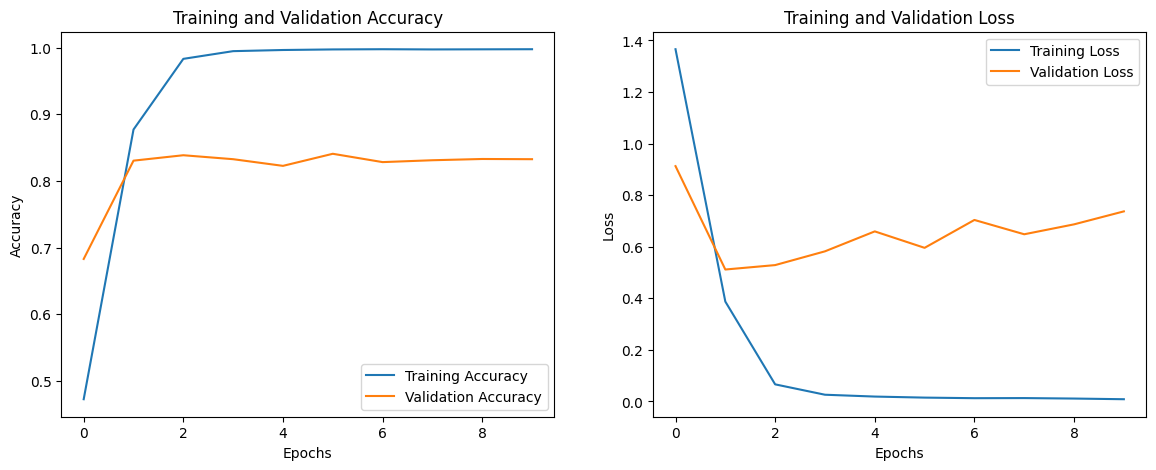

In [19]:
# Plotting accuracy
import matplotlib.pyplot as plt

# Plot loss and accuracy curves
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

###**Testing our model prediction**

In [41]:
input_text = "I am very happy"

# Preprocess the input text
input_text = "I am very happy, I can't stop laughing"
input_sequences = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequences, maxlen=max_length)

# Predict the sentiment
prediction = model.predict(padded_input_sequence)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])

1/1 [==============================] - 0s 47ms/step


In [42]:
print(f"Predicted Emotion is: {predicted_label[0]}")

Predicted Emotion is: joy
